# PyTorch Computer Vision

## 0. Computer Vision Libraries in PyTorch

* `torchvision` - base library for PyTorch computer vision
* `torchvision.dataset` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating vision data
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.DataLoader` - creates Python iterable over a dataset

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


## 1. Getting a dataset 

The dataset we will be using is FashionMNIST from `torchvision.datasets`. It's like MNIST (the handwritten digit dataset that's like the 'Hello World' of CV) but for clothes because MNIST is too overused and too easy for computers now.

In [3]:
# Setting up training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where the data will be downloaded?
    train=True, # do we want the training dataset?
    download=True, # do we want to download it?
    transform=ToTensor(), # we want to transform the data into tensors
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# shows all the possible labels/classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
# shows labels with corresponding index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# labels of all the training data
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Checking input and output shapes of data

In [9]:
# shape of the first entry of training data, along with its label which has no shape bc it's an int
print(f"Image Shape: {image.shape} -> [color channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image Label: Ankle boot


### 1.2 Visualizing our data

Image Shape: torch.Size([1, 28, 28])


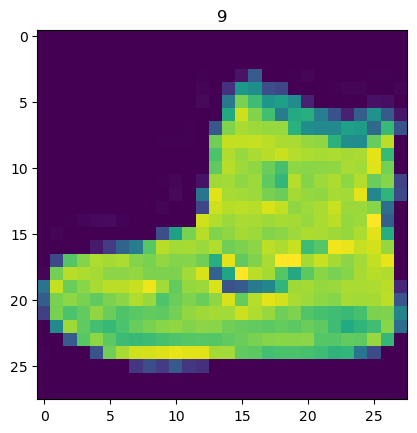

In [10]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze()) # plt cannot plot a shape of (1, 28, 28) so squeezing will remove the 1 dimension and allow plotting of a 28x28 image
plt.title(label);


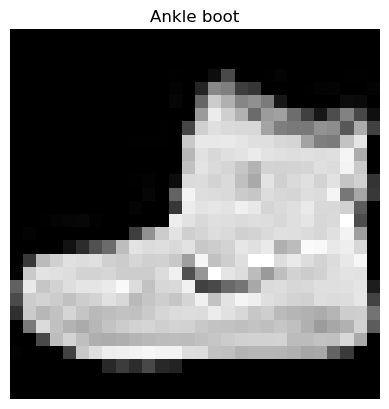

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

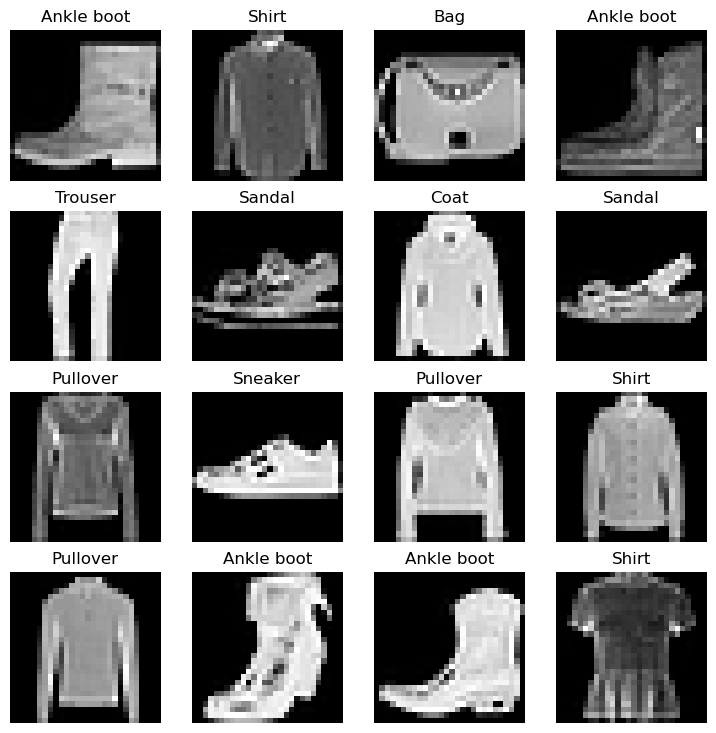

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 2. Prepare DataLoader

Right now, the data is in the form of PyTorch datasets. DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

We do this because:

1. It is more computationally efficient, meaning the computer cannot look at a large amount of images at once, so it is broken down into batches.
2. It gives the neural network more chances to update its gradients each epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1661314b800>,
 <torch.utils.data.dataloader.DataLoader at 0x16612e1f800>)

In [14]:
# Let's check out what we've created

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001661314B800>, <torch.utils.data.dataloader.DataLoader object at 0x0000016612E1F800>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

If you look at what's inside the dataloader, the shape of `train_features_batch` will be in [batch size, color channels, height, width] format and `train_labels_batch` is a tensor of shape 32, meaning 32 labels, 1 for each image in the batch.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


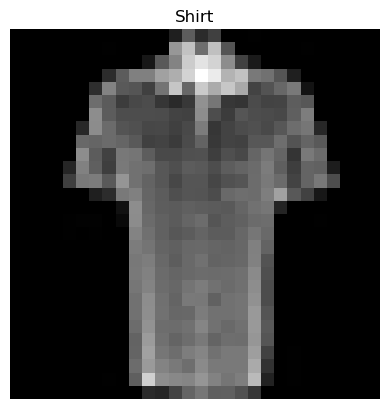

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments, it is best practice to start with a baseline model to try and improve upon with subsequent models. Basically, start simple and add complexity as you go.

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample from x (x is the first batch of the train dataloader)
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


We're flattening the image because we're building a linear model as the baseline model and it won't be capable of handling multi-dimensional data like the image's original tensor shape.

In [18]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28, tensor shape after flattening
    hidden_units=10,
    output_shape=len(class_names) # one for each class
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since this is a multi-class problem, `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric - multi-class problem, so use accuracy

In [20]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Already installed.")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

Already installed.


In [21]:
# Import accuracy metric
from helper_functions import accuracy_fn, print_train_time

# Setup loss and optim
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all

In [22]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader): # batch is simply the # batch it is on, given by enumerate, X is a batch, and y is the batch labels
        model_0.train()
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the training loss to later calculate avg loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 400 == 0:
            print(y.shape)
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    
    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)   
    
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")
    
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
torch.Size([32])
Looked at 0/60000 samples.
torch.Size([32])
Looked at 12800/60000 samples.
torch.Size([32])
Looked at 25600/60000 samples.
torch.Size([32])
Looked at 38400/60000 samples.
torch.Size([32])
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:05<00:11,  5.76s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
torch.Size([32])
Looked at 0/60000 samples.
torch.Size([32])
Looked at 12800/60000 samples.
torch.Size([32])
Looked at 25600/60000 samples.
torch.Size([32])
Looked at 38400/60000 samples.
torch.Size([32])
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:11<00:05,  5.74s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
torch.Size([32])
Looked at 0/60000 samples.
torch.Size([32])
Looked at 12800/60000 samples.
torch.Size([32])
Looked at 25600/60000 samples.
torch.Size([32])
Looked at 38400/60000 samples.
torch.Size([32])
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:17<00:00,  5.69s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265

Train time on cpu: 17.064 seconds


## 4. Make predictions and get Model 0 results

In [23]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else 'cpu'

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
    
# Calculate model 0 results on test dataset

model_0_results = eval_model(model=model_0, 
                             data_loader=test_dataloader, 
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)    

model_0_results    

100%|██████████| 313/313 [00:00<00:00, 541.22it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Model 1: Building a better model with non-linearity

In [24]:
# Create a model with linear and non-linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [25]:
# Create an instance of model_1
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_1 = FashionMNISTModelV1(input_shape=784, # size of tensor after flatten
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)



### 5.1 Setup loss, optimizer and evaluation metrics

In [26]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 5.2 Functionizing training and eval/test loops

In [27]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.train()

    for X, y in data_loader: # batch is simply the # batch it is on, given by enumerate, X is a batch, and y is the batch labels
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the training loss to later calculate avg loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # logits -> pred labels
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.5f}%")
    
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)   
        print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}\n")

In [28]:
from timeit import default_timer as timer

torch.manual_seed(42)
epochs = 3
train_time_start = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_1, train_dataloader, loss_fn, accuracy_fn, device)

train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.09199 | Train Acc: 61.34333%


 33%|███▎      | 1/3 [00:08<00:17,  8.55s/it]

Test loss: 0.9273, Test acc: 66.0050

Epoch: 1
---------
Train Loss: 0.73779 | Train Acc: 73.69333%


 67%|██████▋   | 2/3 [00:17<00:08,  8.54s/it]

Test loss: 0.6879, Test acc: 75.4267

Epoch: 2
---------
Train Loss: 0.66776 | Train Acc: 76.07667%


100%|██████████| 3/3 [00:25<00:00,  8.64s/it]

Test loss: 0.6433, Test acc: 76.8717


Train time on cpu: 25.934 seconds


In [29]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device= device)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 538.47it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.68743497133255,
 'model_acc': 75.65894568690096}

In [30]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Basically, adding non-linearity to the second model didn't do much to improve the results of the baseline model.

## 6. Building a Convolutional Neural Network

In [31]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_layer_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_layer_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")    
        return x

In [32]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, # input shape of 1 because our pictures only have a single color channel
                              output_shape=len(class_names)).to(device)

### 6.1 Stepping through `nn.Conv2d()`

In [33]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [34]:
# Creating a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # equivalent to 3x3
                       stride=1,
                       padding=1)

# Pass the data through the conv layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 6.2 Stepping through `nn.MaxPool2d()`

In [35]:
# Creating a single MaxPool2d layer
torch.manual_seed(42)
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_img_thru_conv = conv_layer(test_image)
print(f"Shape after pass through conv layer: {test_img_thru_conv.shape}")
test_img_thru_pool = max_pool_layer(test_img_thru_conv)
print(f"Shape after pass through conv and pool layer: {test_img_thru_pool.shape}")


Shape after pass through conv layer: torch.Size([10, 64, 64])
Shape after pass through conv and pool layer: torch.Size([10, 32, 32])


In [36]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [37]:
model_2(rand_image_tensor.unsqueeze(dim=1).to(device))

tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], grad_fn=<AddmmBackward0>)

### 6.3 Setup a loss function and optimizer for `model_2`

In [38]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 6.4 Training and testing `model_2` using our train and test functions

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.59164 | Train Acc: 78.60833%


 33%|███▎      | 1/3 [00:10<00:20, 10.47s/it]

Test loss: 0.3873, Test acc: 86.1921

Epoch: 1
------
Train Loss: 0.36048 | Train Acc: 87.02167%


 67%|██████▋   | 2/3 [00:20<00:10, 10.49s/it]

Test loss: 0.3485, Test acc: 87.2704

Epoch: 2
------
Train Loss: 0.32278 | Train Acc: 88.29667%


100%|██████████| 3/3 [00:31<00:00, 10.47s/it]

Test loss: 0.3504, Test acc: 87.7696


Train time on cpu: 31.402 seconds


In [40]:
# Get model 2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

100%|██████████| 313/313 [00:00<00:00, 330.33it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3503691554069519,
 'model_acc': 87.76956869009585}

## 7. Compare model results and training time

In [41]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.687435,75.658946
2,FashionMNISTModelV2,0.350369,87.769569


In [42]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,17.064075
1,FashionMNISTModelV1,0.687435,75.658946,25.934097
2,FashionMNISTModelV2,0.350369,87.769569,31.401904


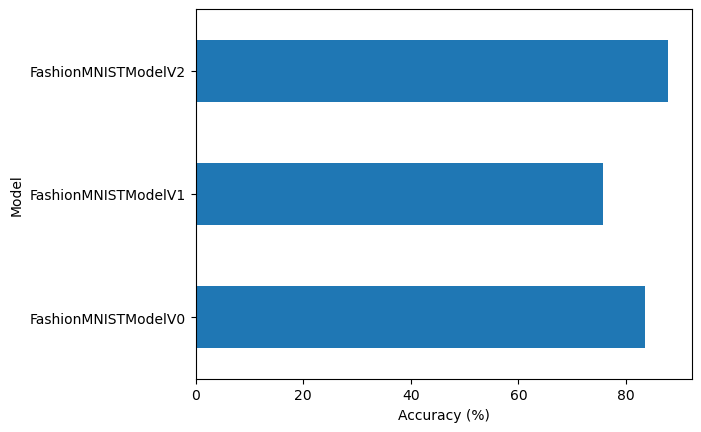

In [43]:
# Visualize results and compare
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

## 8. Make and evaluate random predictions with best model

In [44]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # unsqueeze to add the batch size dimension
            
            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Get pred prob (logit to pred prob)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off GPU
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [45]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

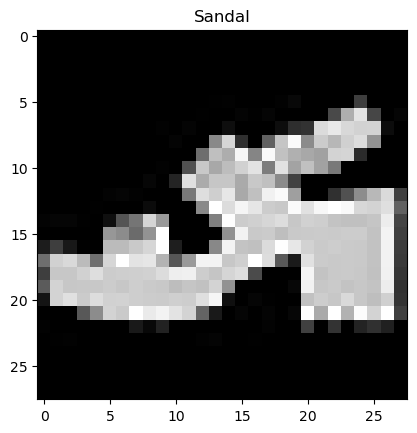

In [46]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]]);

In [47]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[5.0025e-06, 1.7830e-06, 6.1027e-07, 2.2852e-06, 1.1053e-07, 9.9954e-01,
         1.0665e-05, 9.1797e-06, 4.3380e-05, 3.9081e-04],
        [9.6808e-03, 4.0133e-01, 1.1170e-03, 1.2971e-01, 3.9509e-01, 2.0393e-03,
         5.6769e-02, 7.2370e-04, 2.2029e-03, 1.3440e-03]])

In [48]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 9, 4, 3, 0, 4, 7, 1])

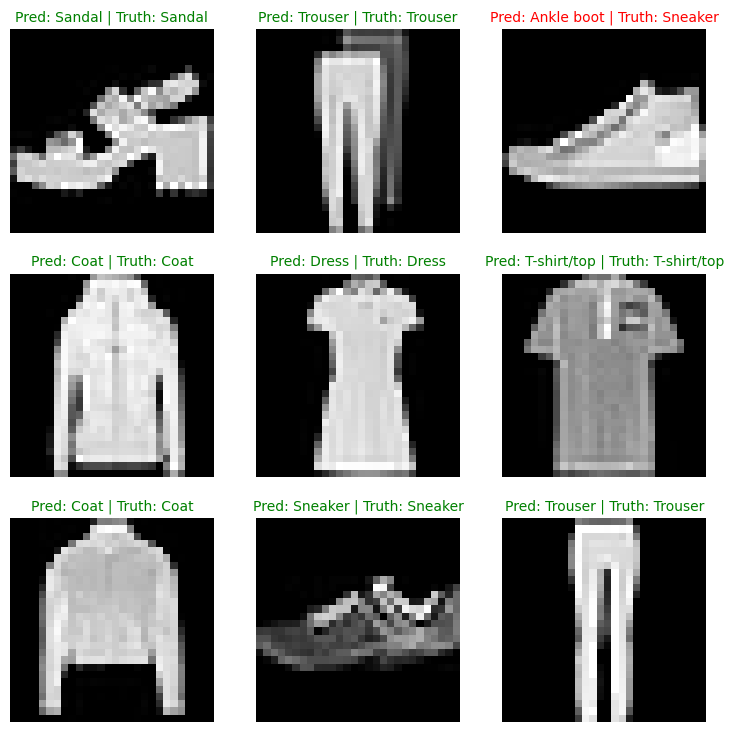

In [49]:
# Plot predictions

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    
    plt.axis(False)
    

## 9. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix with `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [53]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        # logits -> pred probs -> pred labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put preds on CPU for evaluation (bc matplotlib is on cpu)
        y_preds.append(y_pred.cpu())
    
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 326.71it/s]


tensor([9, 2, 1,  ..., 8, 1, 2])

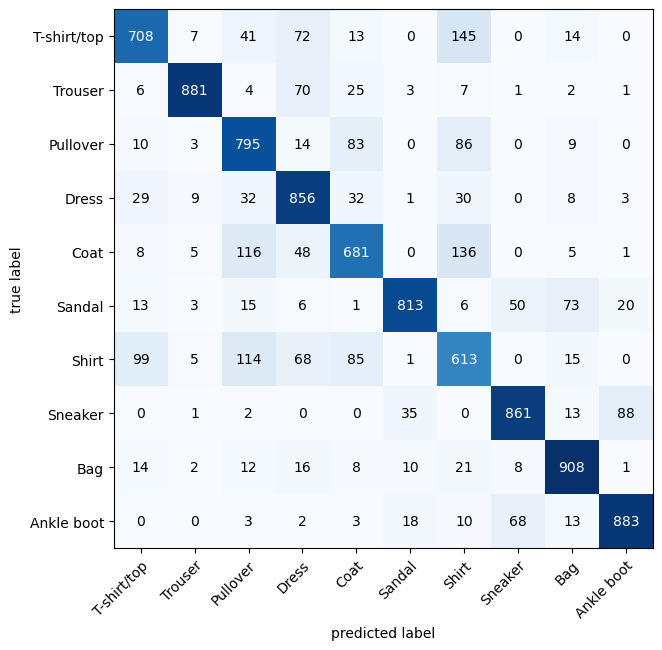

In [60]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 10. Saving and loading a model

In [62]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = '03_pytorch_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))